In [1]:
#  import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline


In [2]:
# function to clean column names
def clear_cols(s):
    return s.strip().replace(" ","_")
# load data
path = '../Healthcare Provider Fraud Detection Analysis/Train_Beneficiarydata-1542865627584.csv'
df = pd.read_csv(path).rename(columns=clear_cols)

# display all columns
pd.set_option('display.max_columns', 50)

* Shape of dataset: `138,556` rows, and `25` columns.
* The number of unique beneficiaries -> `138,556`
* We have 98.97% patiant alive, and 1.03% dead
* Date of Birth in dataset between `1909-01-01` and `1983-12-01`.
* Date of Death in dataset between `2009-02-01` and `2009-12-01`.
<style>
    h3 {color:lightblue;}
</style>
<h3> Based on the dataset creator: the value 0 represent: "No", and the value 1 means "Yes"</h3>
- In every row we have null values. Should we `fillna` with '0' or leave it like that?



* How many providers and physicians worked together?
* Will it help to plot out the distribution of all the `int` / `float` columns with boxplot?

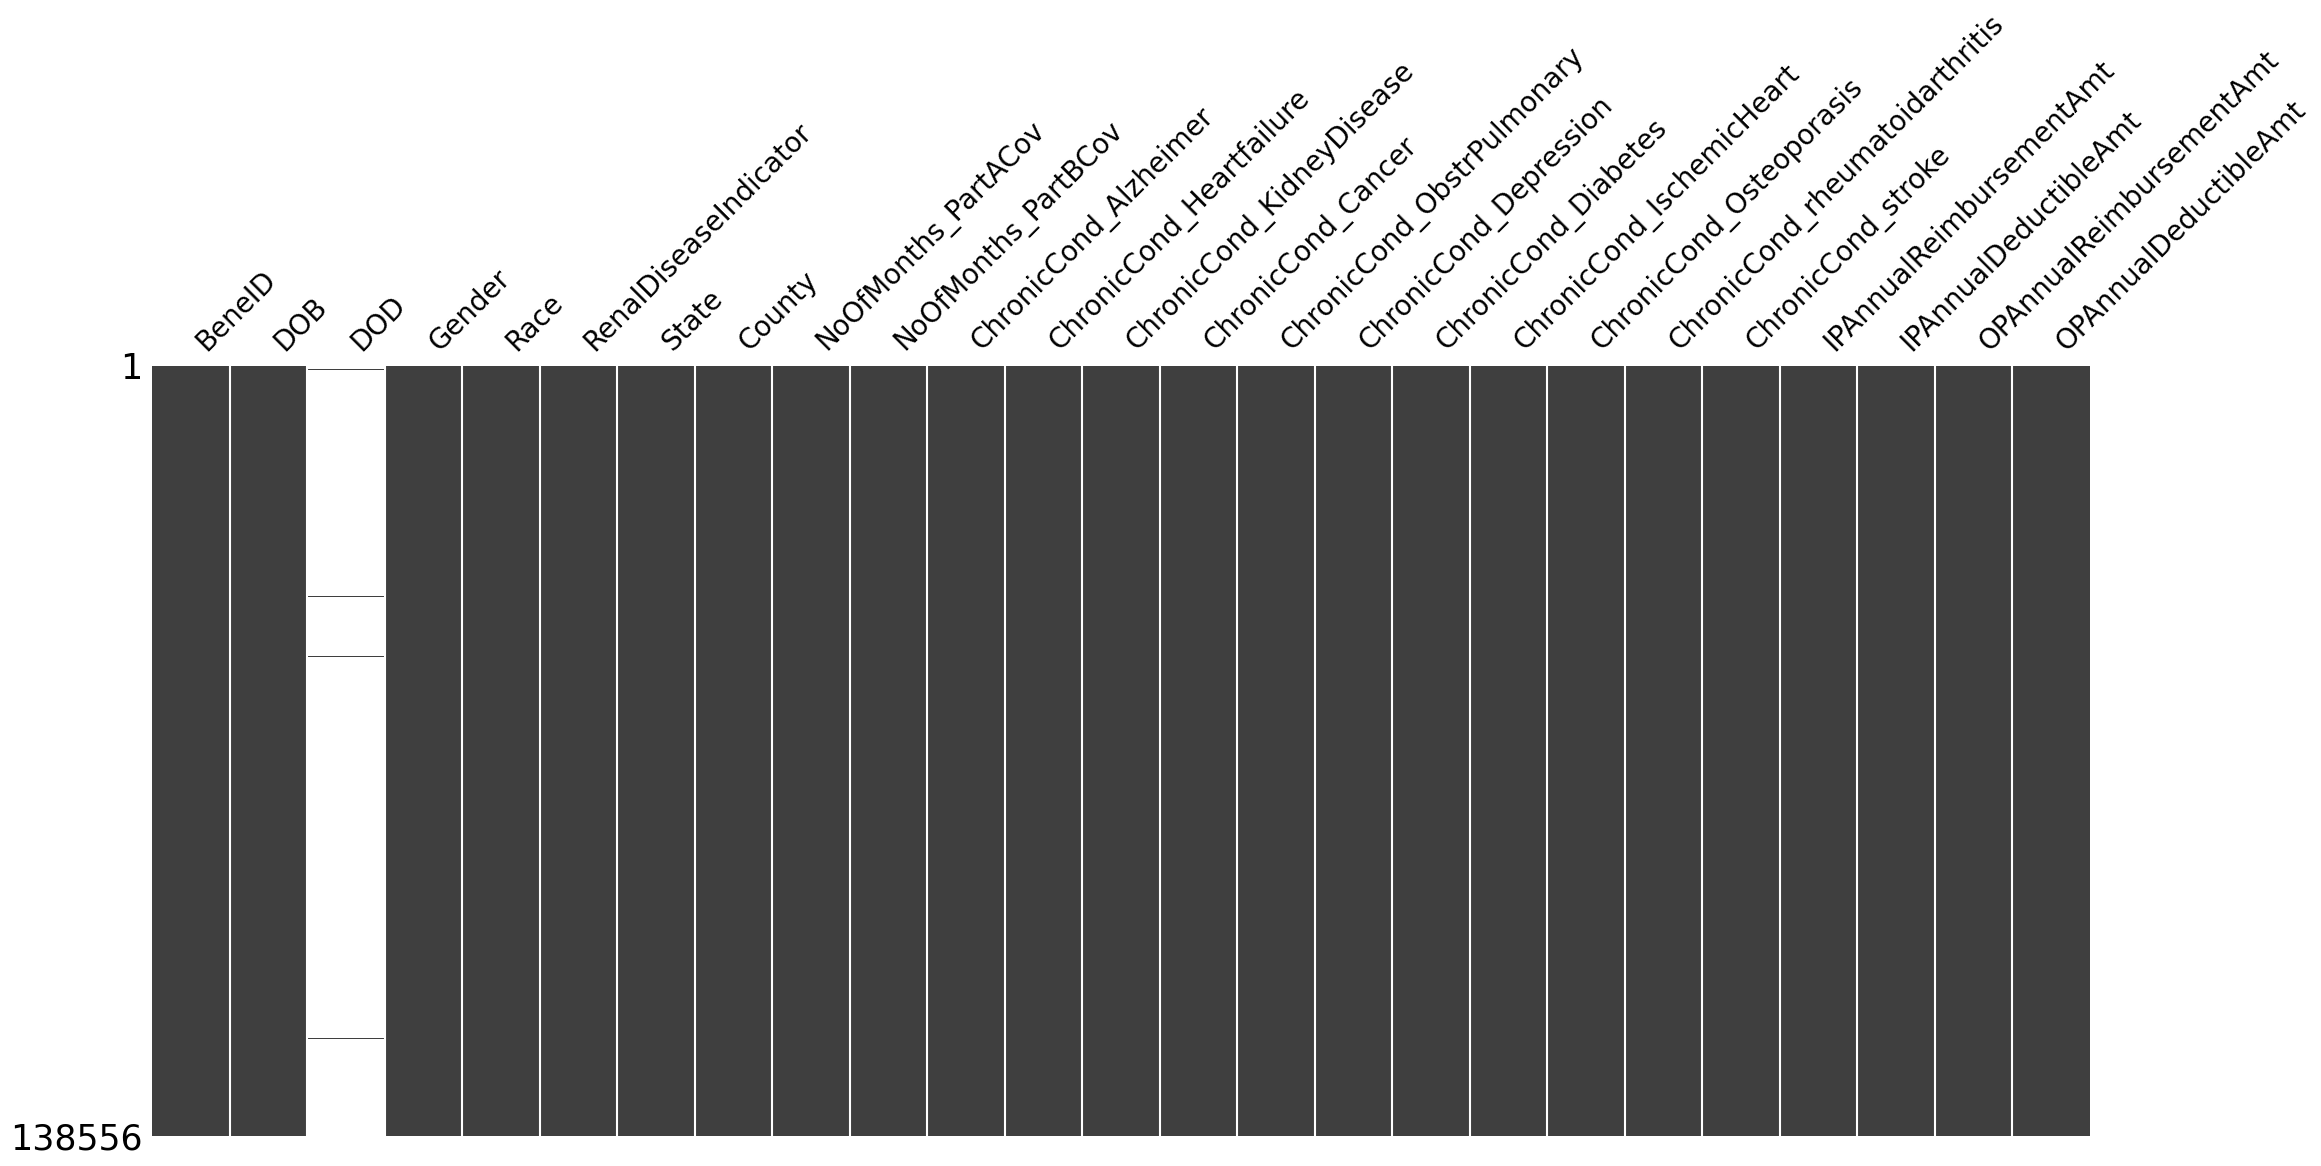

In [3]:
msno.matrix(df, sparkline=False, fontsize=20)
plt.show()

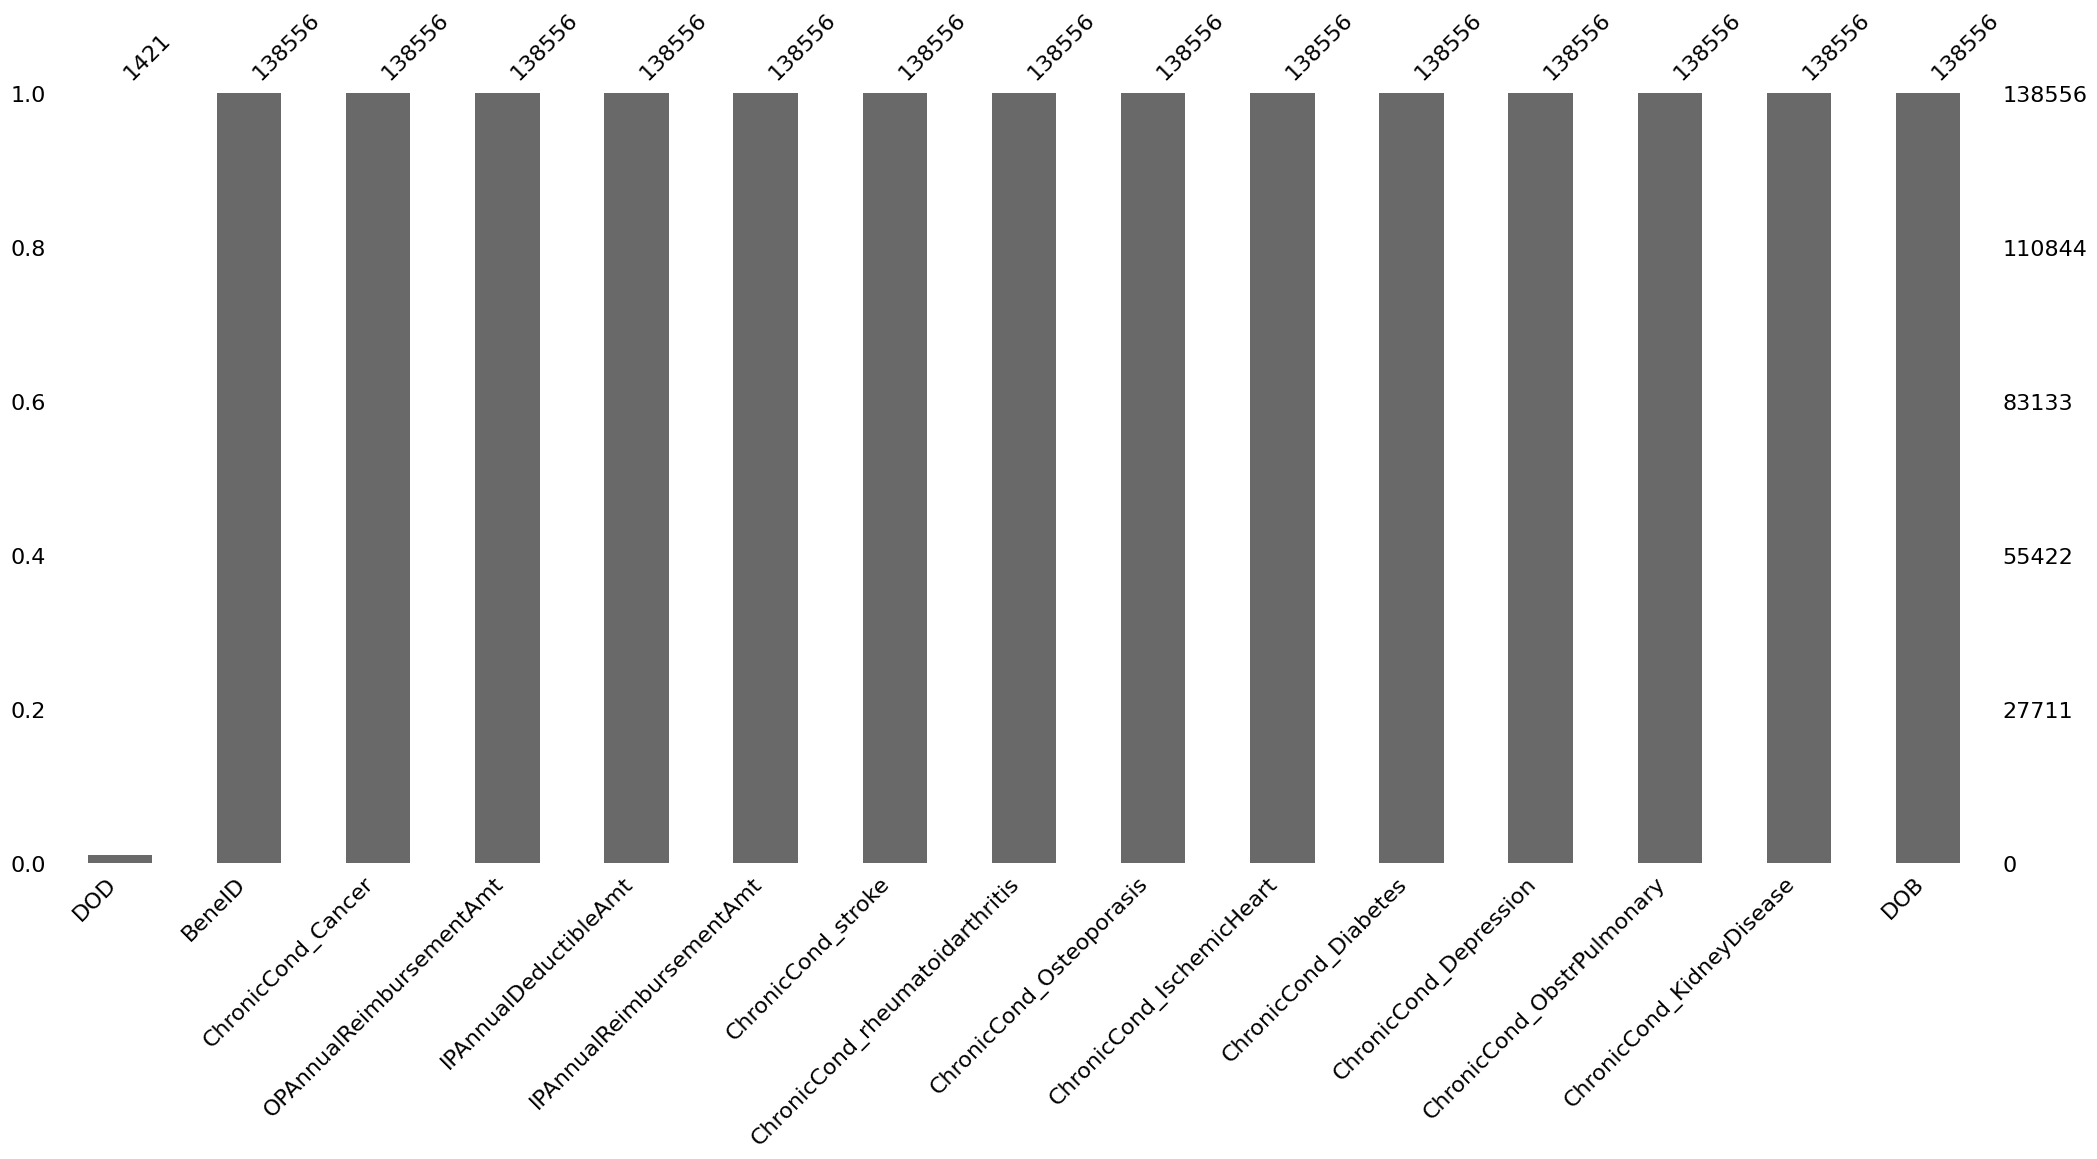

In [4]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sort the DataFrame columns by the percentage of missing values
sorted_df = df[missing_info.sort_values(by='Percentage', ascending=False).index]

# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

#Visual with missingno
msno.bar(top_15_missing)
plt.show()

In [5]:
print("shape: ", df.shape)
df.sample(5)

shape:  (138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
49916,BENE64455,1969-11-01,NaN,1,1,0,31,200,12,12,2,1,2,2,2,1,1,1,2,1,2,0,0,200,100
28741,BENE41808,1943-07-01,NaN,2,1,0,25,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,310,320
39105,BENE52896,1950-03-01,NaN,2,2,0,3,60,12,12,2,2,2,2,2,1,1,2,2,2,2,0,0,500,20
27030,BENE39964,1961-01-01,NaN,1,2,0,5,600,12,12,1,1,2,2,1,1,1,1,2,1,2,51400,2136,2610,570
20805,BENE33283,1927-07-01,NaN,1,1,0,42,70,12,12,1,1,2,1,2,2,1,1,1,2,2,0,0,900,800


In [6]:
df.columns.to_list()

['BeneID',
 'DOB',
 'DOD',
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [8]:
# presentage of missing values
df.isna().sum()/len(df) *100

BeneID                              0.000000
DOB                                 0.000000
DOD                                98.974422
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

In [9]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOD'] = pd.to_datetime(df['DOD'])
# df.info()

In [10]:
df.describe()

,DOB,DOD,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556,1421,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1936-04-30 16:46:00.772539520,2009-07-27 22:27:46.995073792,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
min,1909-01-01 00:00:00,2009-02-01 00:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1928-01-01 00:00:00,2009-06-01 00:00:00,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,1935-09-01 00:00:00,2009-08-01 00:00:00,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,1941-12-01 00:00:00,2009-10-01 00:00:00,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,1983-12-01 00:00:00,2009-12-01 00:00:00,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000
std,NaN,NaN,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187


In [11]:
df.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

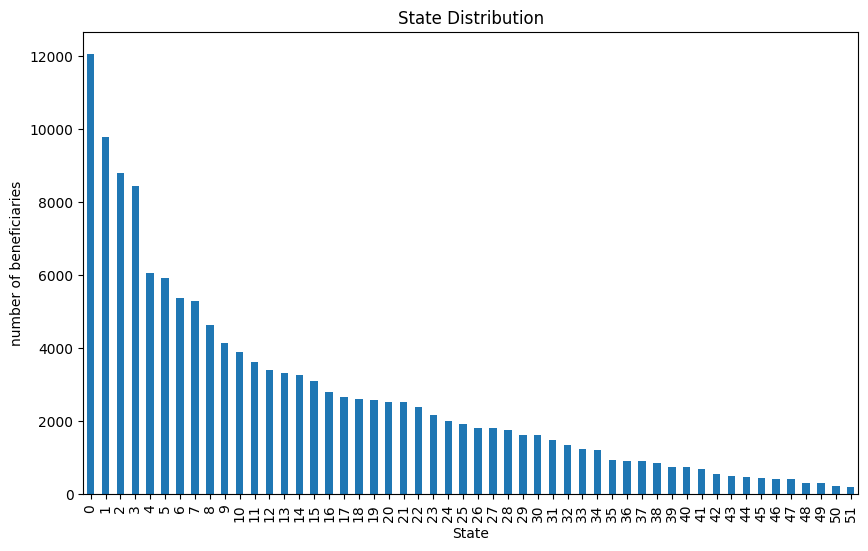

In [12]:
state = df['State'].value_counts().reset_index().sort_values(by='count', ascending=False)
state['count'].plot(kind='bar', figsize=(10, 6))
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('number of beneficiaries')
plt.show()

In [13]:
df['BeneID'].value_counts().sort_values(ascending=False)

BeneID
BENE11001     1
BENE11019     1
BENE11005     1
BENE11006     1
BENE11007     1
             ..
BENE159197    1
BENE159182    1
BENE159059    1
BENE159165    1
BENE159198    1
Name: count, Length: 138556, dtype: int64

In [14]:
print(f"The number of unique beneficiaries -> {df['BeneID'].nunique()}")

The number of unique beneficiaries -> 138556


Gender
2    79106
1    59450
Name: count, dtype: int64


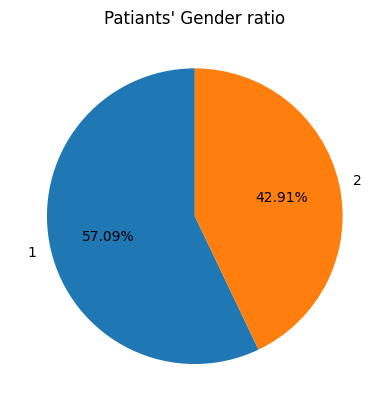

In [15]:
print(df['Gender'].value_counts())

plt.pie(df['Gender'].value_counts(), labels=['1','2'], autopct='%1.2f%%',startangle=90)
plt.title("Patiants' Gender ratio")
plt.show()

Race
1    117057
2     13538
3      5059
5      2902
Name: count, dtype: int64


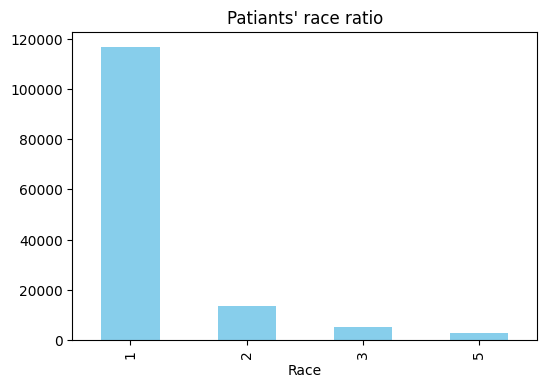

In [16]:
print(df['Race'].value_counts())

# df['race'].plot()
df['Race'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')
plt.title("Patiants' race ratio")
plt.show()

In [138]:
def plot_bar(data, columns, figsize=(7, 5)):
    """
    Plots bar plots for the specified columns in the dataframe.

    Parameters:
        data (pd.DataFrame): The dataframe containing the data.
        columns (list): List of column names to plot.
        figsize (tuple): Figure size for the plots.
    """
    for col in columns:
        if col in data.columns:
            # Calculate value counts and percentages
            value_counts = data[col].value_counts()
            percentages = value_counts / value_counts.sum() * 100
            
            # Plot bar chart
            plt.figure(figsize=figsize)
            ax = value_counts.plot(kind='bar')
            
            # Add percentage labels to bars
            for i, (count, pct) in enumerate(zip(value_counts, percentages)):
                ax.text(i, count + 0.5, f'{pct:.2f}%', ha='center')
            
            plt.title(f'Bar Plot of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.ylim(0, value_counts.max() * 1.2)  # Add some space for the labels
            plt.tight_layout()
            plt.show()

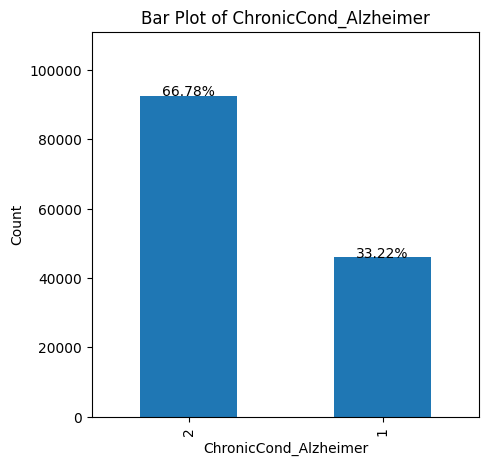

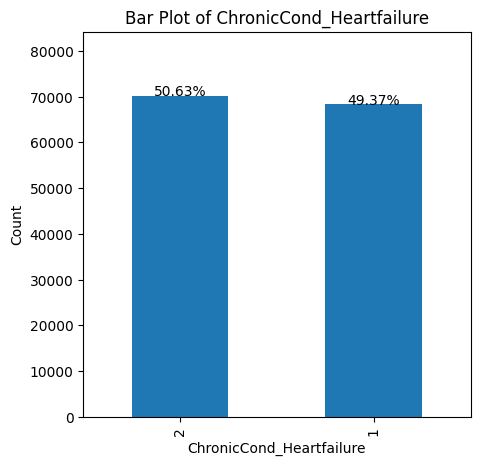

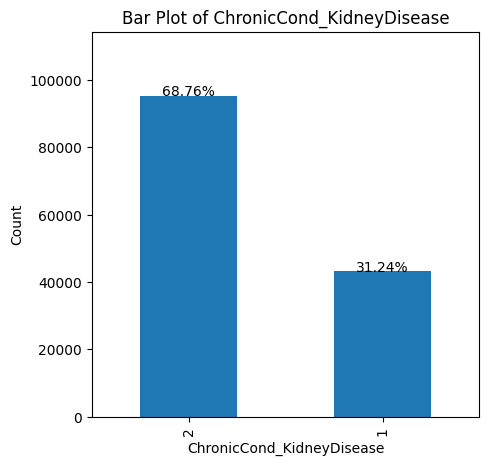

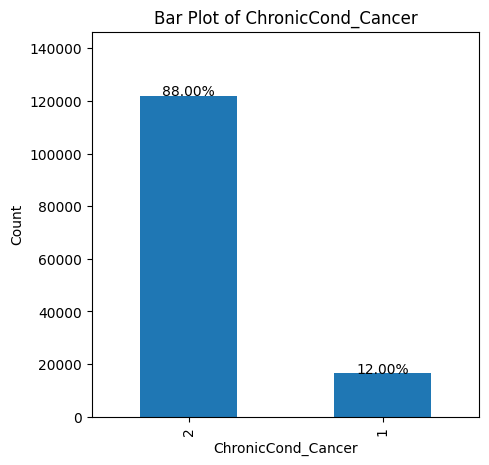

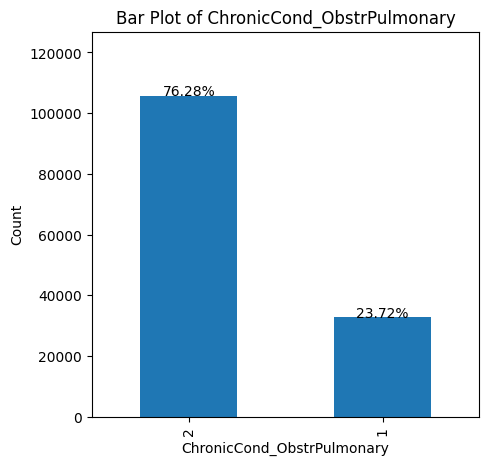

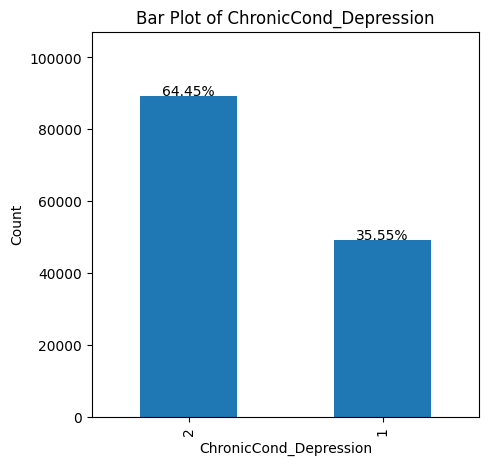

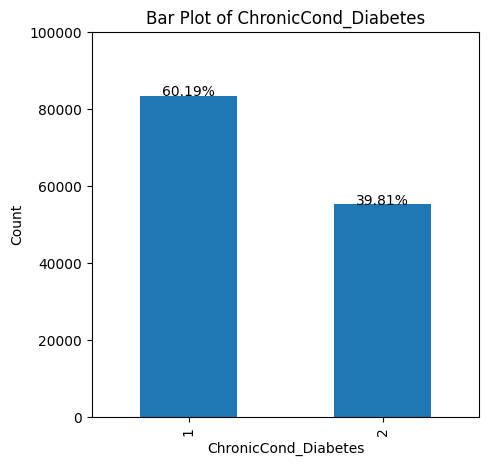

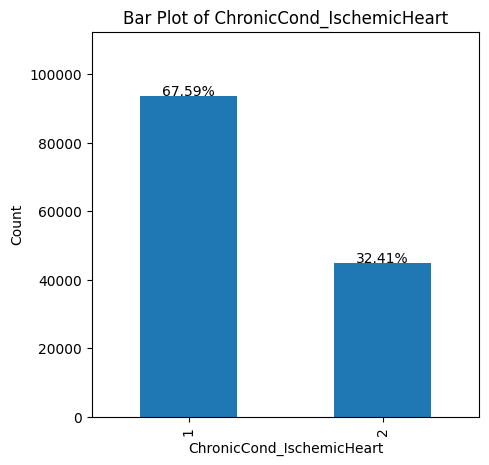

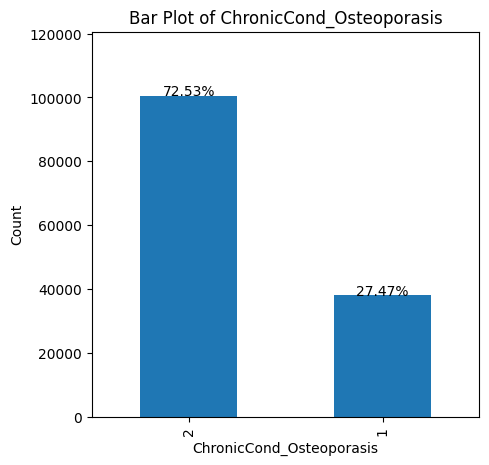

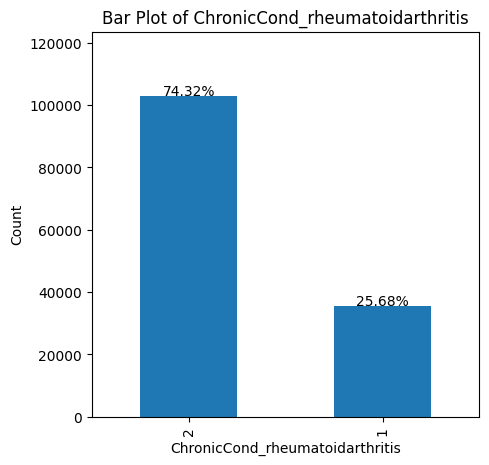

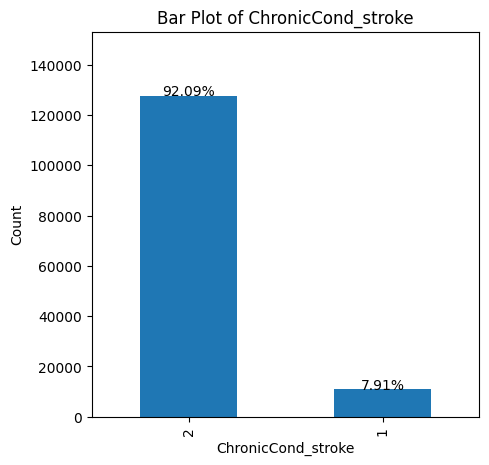

In [18]:
columns_to_plot = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
plot_bar(df, columns_to_plot)

<Axes: xlabel='RenalDiseaseIndicator'>

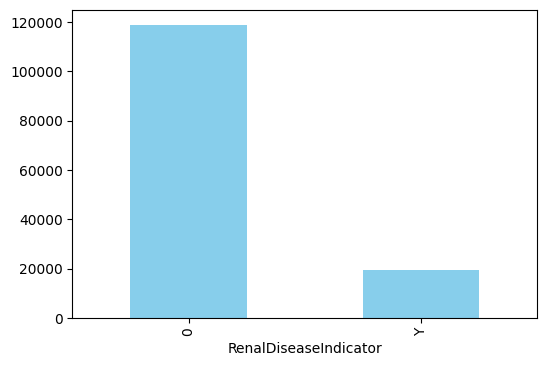

In [19]:
df['RenalDiseaseIndicator'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

In [20]:
df['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    118978
Y     19578
Name: count, dtype: int64

<Axes: xlabel='ChronicCond_Alzheimer'>

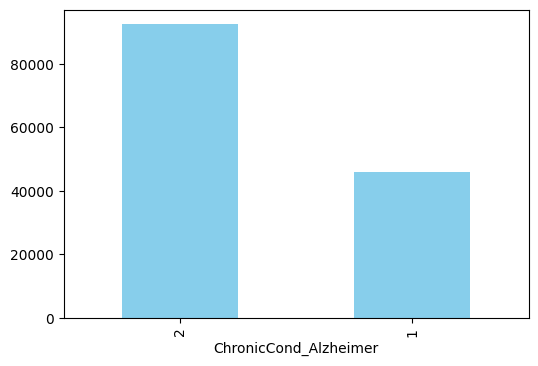

In [21]:
df['ChronicCond_Alzheimer'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

<Axes: xlabel='ChronicCond_Heartfailure'>

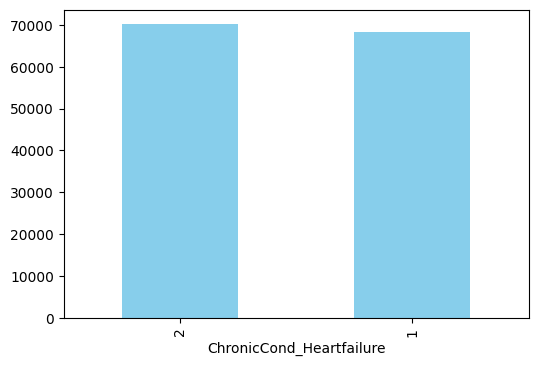

In [22]:
df['ChronicCond_Heartfailure'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

<Axes: xlabel='ChronicCond_KidneyDisease'>

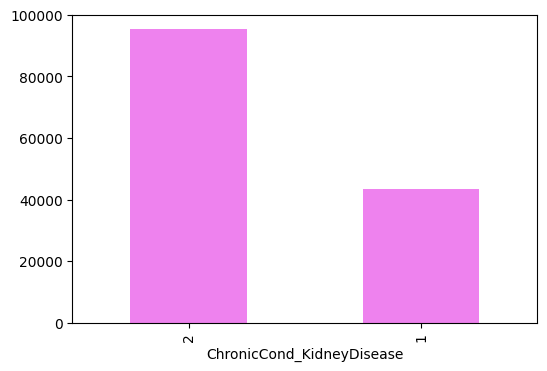

In [23]:
df['ChronicCond_KidneyDisease'].value_counts().plot(kind='bar', figsize=(6, 4),color='violet')

<Axes: xlabel='ChronicCond_Cancer'>

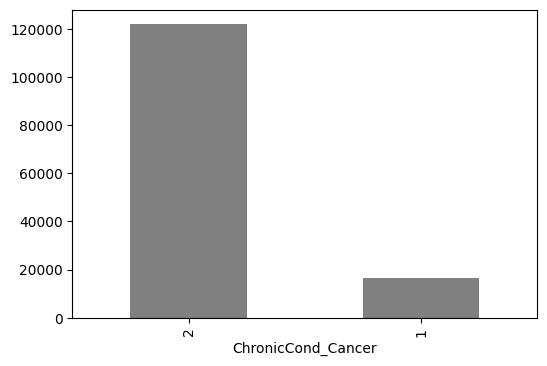

In [24]:
df['ChronicCond_Cancer'].value_counts().plot(kind='bar', figsize=(6, 4),color='gray')

<Axes: xlabel='ChronicCond_ObstrPulmonary'>

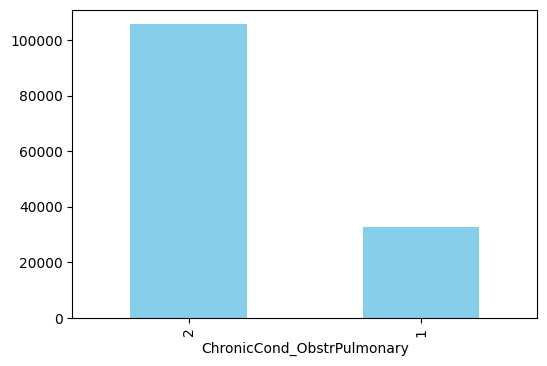

In [25]:
df['ChronicCond_ObstrPulmonary'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

<Axes: xlabel='ChronicCond_Depression'>

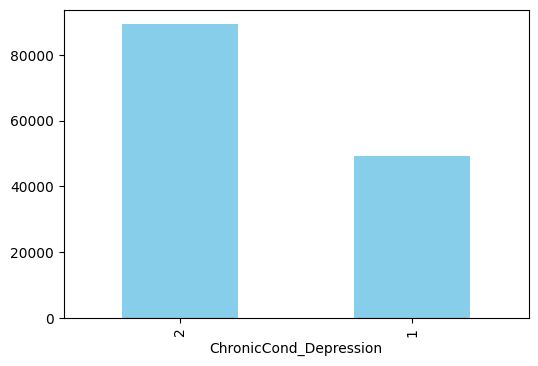

In [26]:
df['ChronicCond_Depression'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

<Axes: xlabel='ChronicCond_Diabetes'>

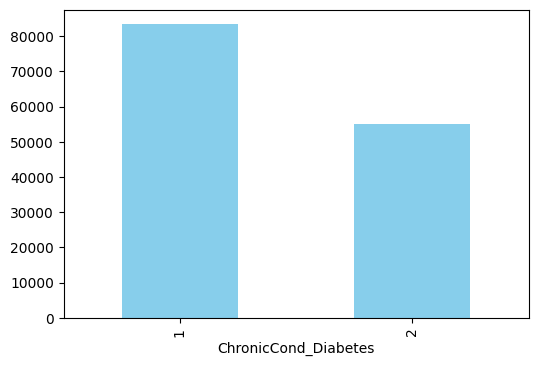

In [27]:
df['ChronicCond_Diabetes'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')

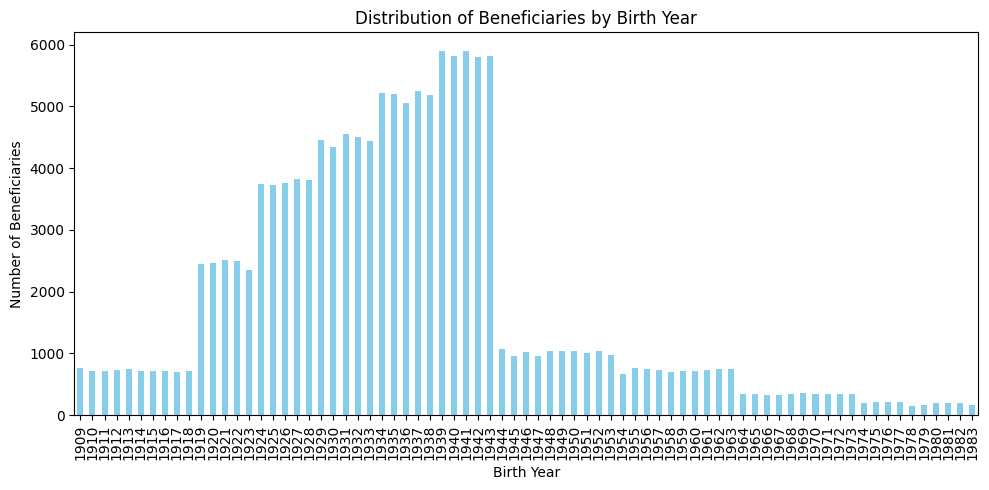

In [28]:
df['BirthYear'] = df['DOB'].dt.year
year_counts = df['BirthYear'].value_counts().sort_index()

plt.figure(figsize=(10, 5)) 
year_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Beneficiaries by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Number of Beneficiaries')
plt.tight_layout()
plt.show()

In [29]:
# load inpatiant data
# path = '../Healthcare Provider Fraud Detection Analysis/Train_Inpatientdata-1542865627584.csv'
# df_Inpatiant = pd.read_csv(path).rename(columns=clear_cols)


In [30]:
# small_1 = df[['BeneID','DOB']]
# small_2 = df_Inpatiant[['BeneID','ClaimID','']]
# age_data  = df.merge()

**I don't think I can know the age of the benefitiaries based on the dataset. I saw others that calculate the max value of DOD, but it doesn't give me the feeling it's the age of all of the patiants**

In [31]:
part_a = df['NoOfMonths_PartACov'].value_counts().reset_index().sort_values(
    by='NoOfMonths_PartACov', ascending=False
    ).rename(columns={'NoOfMonths_PartACov': 'NOM_part_A'})
part_a

,NOM_part_A,count
0,12,137389
3,11,28
5,10,18
9,9,7
4,8,26
6,7,16
2,6,38
8,5,8
7,4,13
10,3,5


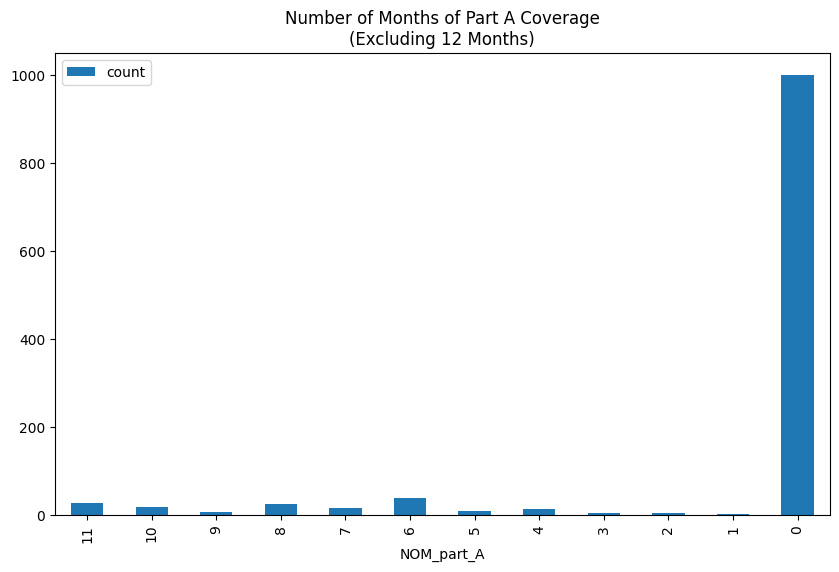

In [32]:
# Plot the number of months of Part A coverage excluding the 12 months
part_a.tail(12).plot(kind='bar', x='NOM_part_A', y='count', figsize=(10, 6))
plt.title('Number of Months of Part A Coverage\n(Excluding 12 Months)')
plt.show()

I removed from this plot the most common answer here (12 months) so i can see the rest of the answers split.
- the most common answer was 12 months with 137389 participants.

In [33]:
part_b = df['NoOfMonths_PartBCov'].value_counts().reset_index().sort_values(
    by='NoOfMonths_PartBCov', ascending=False
    ).rename(columns={'NoOfMonths_PartBCov': 'NOM_part_B'})
part_b

,NOM_part_B,count
0,12,136902
4,11,143
3,10,150
5,9,122
6,8,71
7,7,63
2,6,282
8,5,50
9,4,35
10,3,27


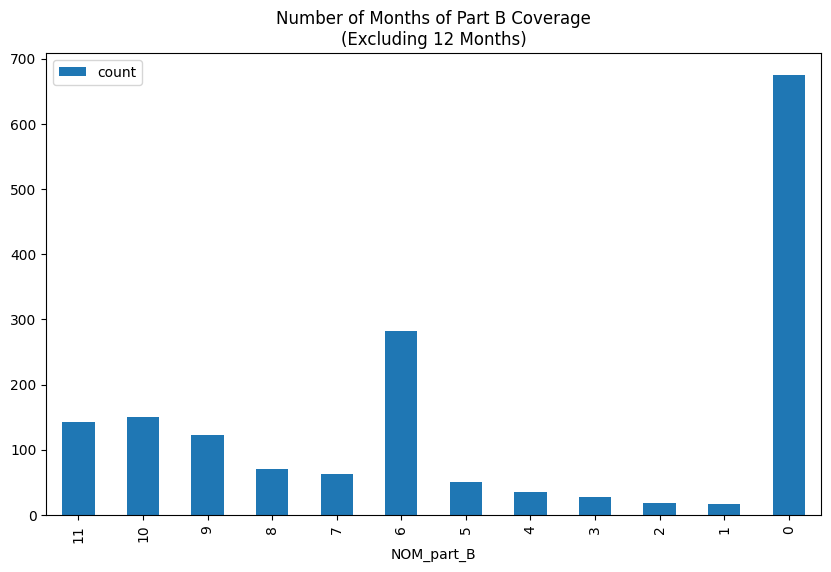

In [34]:
# Plot the number of months of Part B coverage excluding the 12 months
part_b.tail(12).plot(kind='bar', x='NOM_part_B', y='count', figsize=(10, 6),)
# fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=13.5, rotation=0)
plt.title('Number of Months of Part B Coverage\n(Excluding 12 Months)')
plt.show()

I removed the most common answer here (12 months) so i can see the rest of the answers split.
- the most common answer was 12 months with 136902 participants.

In [35]:
df['DOB'].min() , df['DOB'].max()

(Timestamp('1909-01-01 00:00:00'), Timestamp('1983-12-01 00:00:00'))

In [36]:
# Converting to integer and checking if there are any non-integer values
def int_check(col):
    """
    To check if all the values in a column are integers.
    col: column to check
    """
    try:
        df[col] = df[col].astype(int)
        print("All values are integers.")
    except ValueError as e:
        print("There are non-integer values in the column.")

In [37]:
money = df[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']]
money.describe()

,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000
mean,3660.346502,399.847296,1298.219348,377.718258
std,9568.621827,956.175202,2493.901134,645.530187
min,-8000.000000,0.000000,-70.000000,0.000000
25%,0.000000,0.000000,170.000000,40.000000
50%,0.000000,0.000000,570.000000,170.000000
75%,2280.000000,1068.000000,1500.000000,460.000000
max,161470.000000,38272.000000,102960.000000,13840.000000


In [38]:
df.loc[df['IPAnnualReimbursementAmt'] < 0]

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear
3559,BENE14791,1929-04-01,NaT,2,3,0,12,20,12,12,1,2,2,2,2,2,2,2,2,2,2,-640,1068,180,70,1929
8008,BENE19571,1938-07-01,NaT,2,1,0,32,230,12,12,1,1,2,2,1,1,1,1,2,2,2,-300,1068,4720,770,1938
12999,BENE24913,1946-04-01,NaT,1,1,0,49,930,12,12,2,2,2,2,2,2,1,1,2,2,2,-100,1068,100,100,1946
15160,BENE27231,1935-02-01,NaT,1,1,0,42,250,12,12,1,1,2,2,1,1,1,1,1,2,2,-100,1068,1220,770,1935
23146,BENE35786,1937-10-01,NaT,1,1,0,3,60,12,12,2,1,2,2,2,1,1,2,2,1,2,-100,1068,820,1180,1937
31067,BENE44298,1929-02-01,NaT,2,2,0,1,510,12,12,2,1,2,2,2,2,2,1,2,2,2,-300,1068,2430,200,1929
34829,BENE48336,1941-11-01,NaT,2,1,0,18,70,12,12,2,1,2,1,1,2,1,1,2,1,2,-8000,1068,0,30,1941
40986,BENE54894,1926-04-01,NaT,2,1,0,14,141,12,12,2,1,2,2,2,1,1,2,2,2,2,-1000,1068,100,10,1926
69876,BENE85807,1972-12-01,NaT,1,1,0,44,60,12,12,2,2,2,2,2,1,2,1,2,2,2,-40,1068,170,110,1972
75614,BENE91939,1973-09-01,NaT,2,2,0,21,20,12,12,1,2,2,2,2,1,1,2,1,1,2,-300,1068,210,10,1973


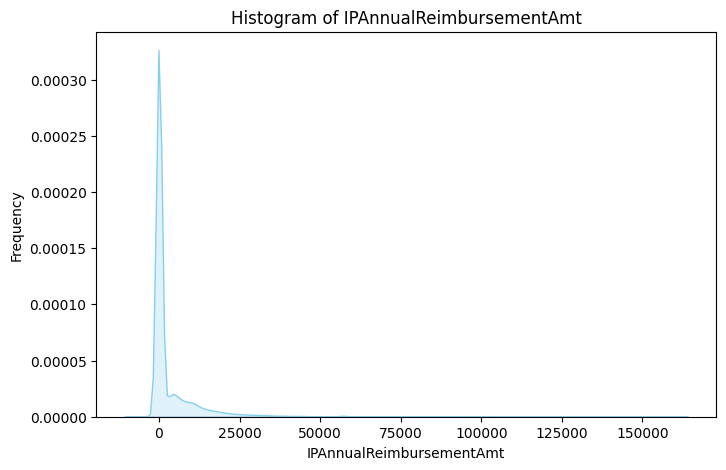

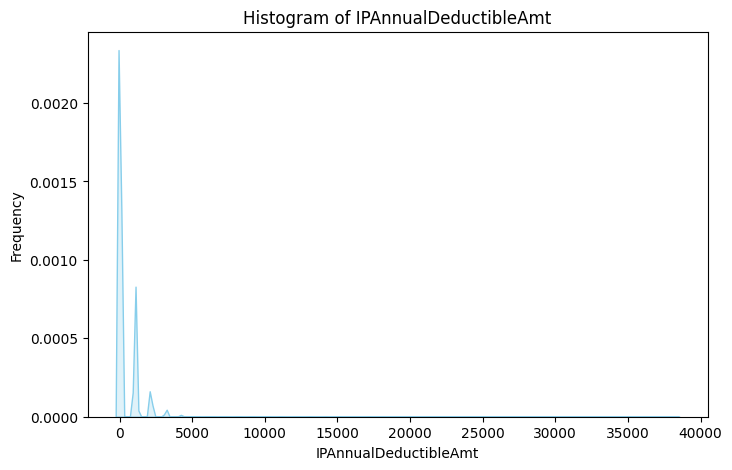

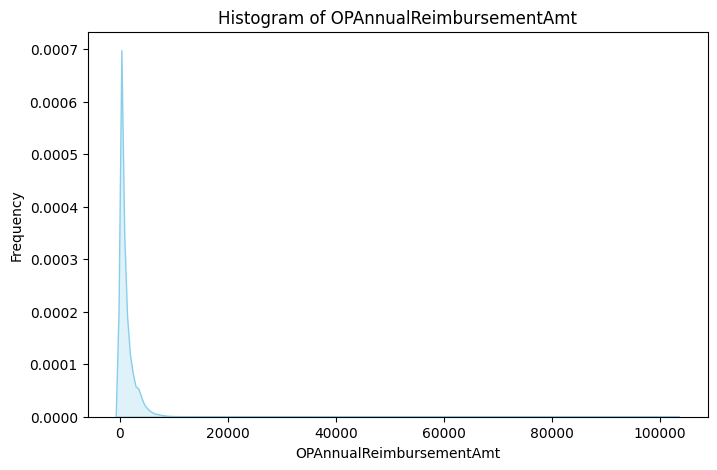

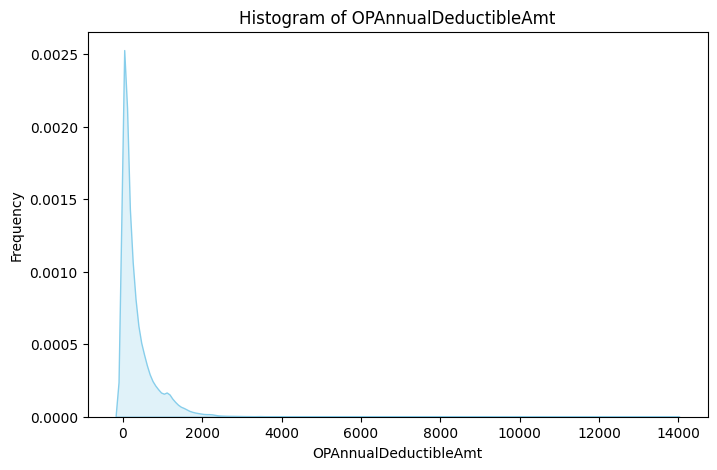

In [39]:
def plot_hist(cols):
    """
    Plots histograms for the specified columns in the dataframe.

    Parameters:
        cols (list): List of column names to plot.
    """
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.kdeplot(df[col], color='skyblue', fill=True)
            # df[col].plot(kind='hist', bins=30, color='skyblue')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()


plot_hist(['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'])

In [40]:
df.groupby('BeneID')['IPAnnualReimbursementAmt'].sum().nlargest(10)

BeneID
BENE155688    161470
BENE112649    155600
BENE158540    155270
BENE22137     153580
BENE14036     148580
BENE112394    147000
BENE83465     144240
BENE111157    144000
BENE102690    143800
BENE13669     139400
Name: IPAnnualReimbursementAmt, dtype: int64

In [41]:
df.loc[df['BeneID'] == 'BENE111157']

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear
93621,BENE111157,1948-07-01,NaT,2,2,0,1,360,12,12,2,1,2,2,1,1,1,1,2,2,2,144000,2136,97510,1145,1948


In [42]:
states = df['State'].value_counts().reset_index().sort_values(by='count', ascending=False)
states.head(10)

,State,count
0,5,12052
1,10,9771
2,45,8780
3,33,8443
4,39,6055
5,14,5923
6,36,5366
7,23,5293
8,34,4629
9,31,4124


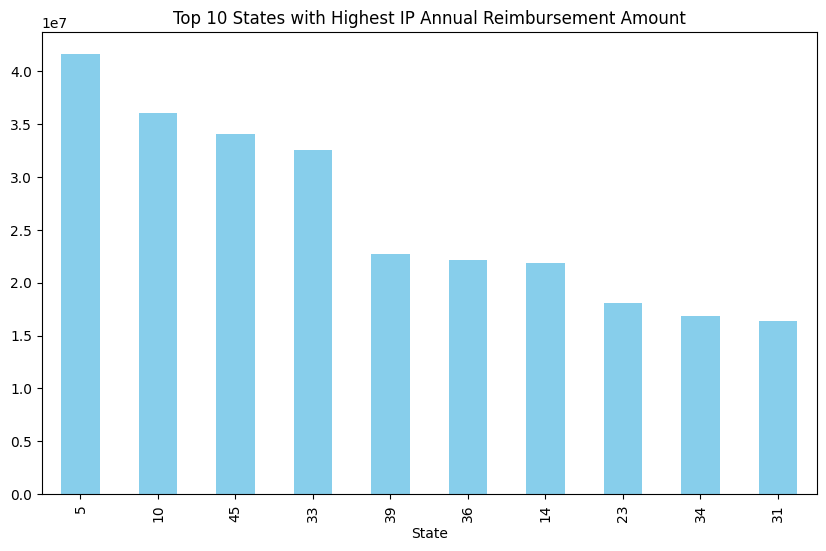

In [43]:
df.groupby('State')['IPAnnualReimbursementAmt'].sum().nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 States with Highest IP Annual Reimbursement Amount')
plt.show()

- I checked here the top 10 states by the number of beneficiaries and the top 10 states by the total IP annual reimbursement amount.
- I'm not sure what else to do with it yet


## <center> Top bene with high reimbursement

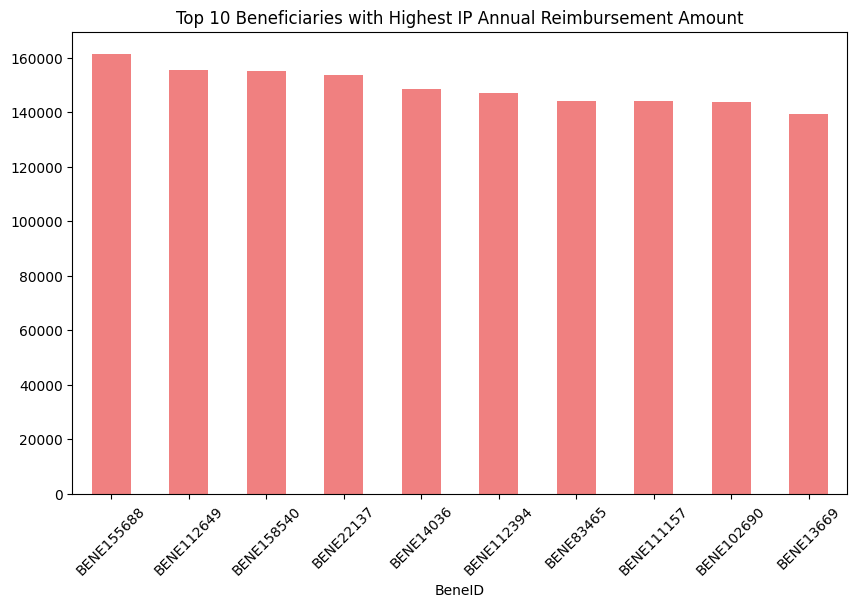

In [44]:
df.groupby('BeneID')['IPAnnualReimbursementAmt'].sum().nlargest(10).plot(kind='bar', figsize=(10, 6), color='lightcoral', )
plt.xticks(rotation=45)
plt.title('Top 10 Beneficiaries with Highest IP Annual Reimbursement Amount')
plt.show()

In [46]:
# df.groupby('BeneID')['OPAnnualReimbursementAmt'].sum().nlargest(10).plot(kind='bar', figsize=(10, 6), color='lightcoral', )
# plt.xticks(rotation=45)

# plt.figure(figsize=(3,5))
# ax = sns.barplot(hue=df['PotentialFraud'].value_counts().index, y=df['PotentialFraud'].value_counts().values, palette='viridis',legend=False)
# for container in ax.containers:
#     ax.bar_label(container, fontsize=10)

# plt.title('Potential Fraud')
# plt.show()

In [132]:
def val_count(data, col):
    """
    To get the value counts of a column.
    data: data frame name
    col: column to get value counts
    """
    for i in col:
        print(f"Value counts for: {data[i].value_counts()}:")
        print("***********************\n\n")


In [48]:
lst = ['Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt']
val_count(lst)

Value counts for: Gender
2    79106
1    59450
Name: count, dtype: int64:
***********************


Value counts for: Race
1    117057
2     13538
3      5059
5      2902
Name: count, dtype: int64:
***********************


Value counts for: RenalDiseaseIndicator
0    118978
Y     19578
Name: count, dtype: int64:
***********************


Value counts for: State
5     12052
10     9771
45     8780
33     8443
39     6055
14     5923
36     5366
23     5293
34     4629
31     4124
11     3892
49     3623
44     3390
22     3306
15     3272
26     3108
50     2793
52     2662
1      2615
21     2570
42     2524
18     2519
3      2395
24     2165
19     1998
37     1926
4      1817
6      1807
16     1746
25     1622
7      1602
38     1468
17     1339
54     1237
51     1212
20      931
28      905
32      895
46      851
29      752
30      732
13      687
27      538
12      484
43      465
41      438
8       415
47      410
35      304
53      295
9       214
2       196
Name: count

In [49]:
df.columns.to_list()

['BeneID',
 'DOB',
 'DOD',
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt',
 'BirthYear']

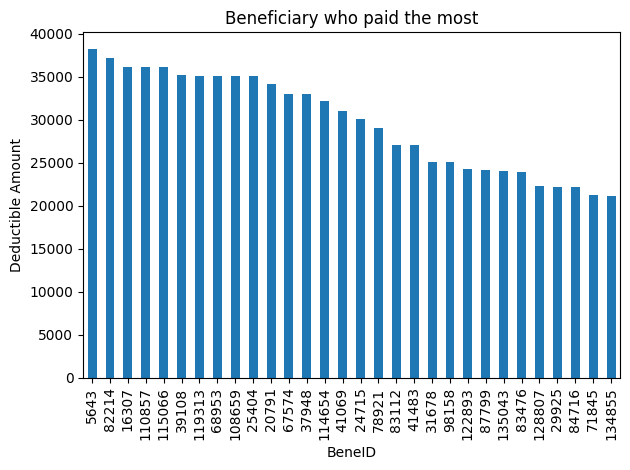

In [159]:
df['IPAnnualDeductibleAmt'].reset_index().sort_values(by='IPAnnualDeductibleAmt', ascending=False).head(30).plot(kind='bar',x='index', legend=False)
plt.title('Beneficiary who paid the most')
plt.ylabel('Deductible Amount')
plt.xlabel('BeneID')
plt.Figure(figsize=(8,5))
plt.tight_layout()
plt.show()

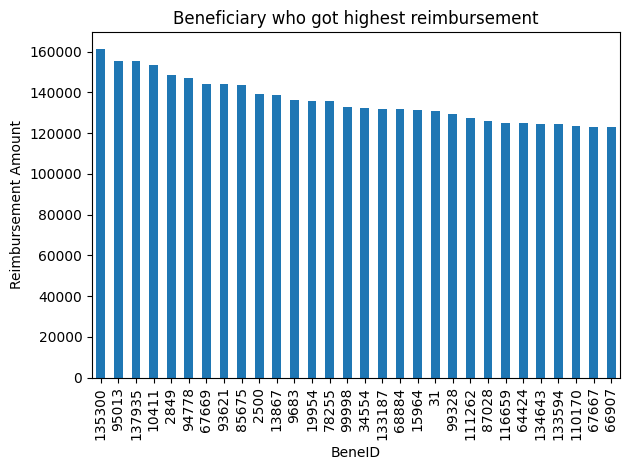

In [162]:
df['IPAnnualReimbursementAmt'].reset_index().sort_values(by='IPAnnualReimbursementAmt', ascending=False).head(30).plot(kind='bar',x='index', legend=False)
plt.title('Beneficiary who got highest reimbursement')
plt.ylabel('Reimbursement Amount')
plt.xlabel('BeneID')
plt.Figure(figsize=(8,5))
plt.tight_layout()
plt.show()

# <center><u> The Copy Area!</u>

In [50]:
print(df['RenalDiseaseIndicator'].value_counts())
print("-"*50)
# df['RenalDiseaseIndicator'].astype(int)
df.loc[df['RenalDiseaseIndicator'] == '0']

RenalDiseaseIndicator
0    118978
Y     19578
Name: count, dtype: int64
--------------------------------------------------


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,1943
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,1936
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,1936
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1922
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200,1935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaT,1,1,0,39,140,12,12,1,2,2,2,2,2,2,2,2,2,2,0,0,430,460,1939
138552,BENE159195,1938-12-01,NaT,2,1,0,49,530,12,12,1,2,2,2,2,2,1,2,2,2,2,0,0,880,100,1938
138553,BENE159196,1916-06-01,NaT,2,1,0,6,150,12,12,2,1,1,1,2,1,1,1,2,2,2,2000,1068,3240,1390,1916
138554,BENE159197,1930-01-01,NaT,1,1,0,16,560,12,12,1,1,2,2,2,2,2,1,2,2,2,0,0,2650,10,1930


In [51]:
# Replace 'Y' with 1
df_renal = df.copy()
df_renal['RenalDiseaseIndicator'] = df_renal['RenalDiseaseIndicator'].replace('Y', 1)

In [52]:
df_renal['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    118978
1     19578
Name: count, dtype: int64

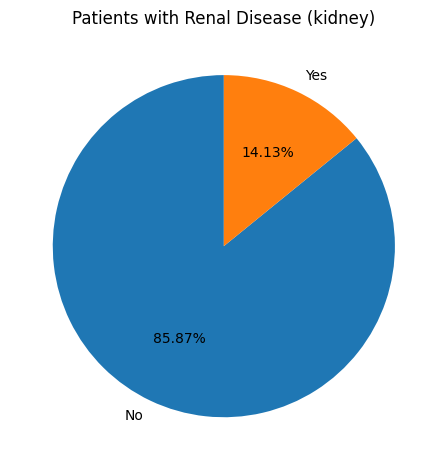

In [170]:
df_renal['RenalDiseaseIndicator'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90, labels=['No','Yes'])
plt.title('Patients with Renal Disease (kidney)')
plt.ylabel('')
plt.xlabel('')
plt.Figure(figsize=(8,5))
plt.tight_layout()
plt.show()

# <center> --- Another try ---

In [53]:
df['DOD'].min() , df['DOD'].max()

(Timestamp('2009-02-01 00:00:00'), Timestamp('2009-12-01 00:00:00'))

In [54]:
df_dead = df.copy()


In [55]:
df['DOD'].value_counts()

DOD
2009-12-01    182
2009-10-01    168
2009-09-01    164
2009-11-01    149
2009-08-01    144
2009-07-01    141
2009-05-01    119
2009-06-01    119
2009-04-01     94
2009-03-01     91
2009-02-01     50
Name: count, dtype: int64

## All the dates of death are between Jan 2009 and December of 2009. (above)

In [115]:
df_dead['whether_dead'] = df_dead['DOD'].apply(lambda val: 0 if val != val else 1)

In [116]:
df_dead['whether_dead'].value_counts().reset_index().rename(columns={'count': "total_counts"})
# percentages

,whether_dead,total_counts
0,0,137135
1,1,1421


Text(0.5, 0, 'Dead or Alive')

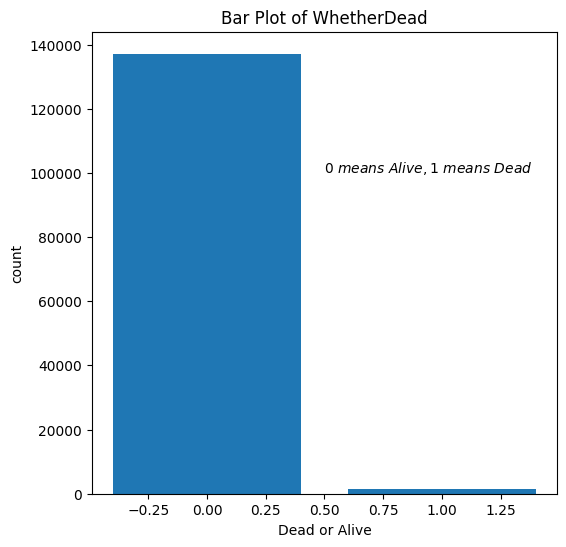

In [117]:
# Experiment of creating bar plot with text inside 
values_ = df_dead['whether_dead'].value_counts().reset_index().rename(columns={'count': "total_counts"})

percentages = values_ / values_.sum() * 100


fig, ax = plt.subplots(figsize=(6,6))
ax.bar(values_.whether_dead, values_.total_counts, ) # <- what do I miss here????


""" 
    text function, a bit complicated for first time.
    first two parameters for the (x,y) location in the plot, based on the values.
    3rd is the input text, notice that it's necessary to escape every time.
""" 
my_test = r'$0\ means\ Alive, 1\ means\ Dead$'
ax.text(0.5,1e5, my_test, fontsize=10)

ax.set_title('Bar Plot of WhetherDead')
ax.set_ylabel('count')
ax.set_xlabel('Dead or Alive')

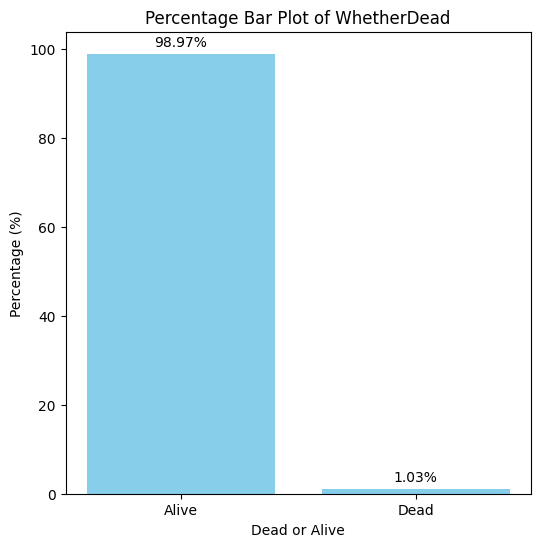

In [188]:
from matplotlib import ticker
# Calculate percentages
values_ = df_dead['whether_dead'].value_counts().reset_index()
values_.columns = ['whether_dead', 'total_counts']
values_['percentage'] = (values_['total_counts'] / values_['total_counts'].sum()) * 100
answer = ('Dead', 'Alive')
x = (1,0)
# Create the bar plot with percentages
fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(values_['whether_dead'], values_['percentage'], color='skyblue')

# Add percentage values on top of each bar
for bar, perc in zip(bars, values_['percentage']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        bar.get_height() + 1,               # Slightly above the bar
        f'{perc:.2f}%',                     # Format percentage
        ha='center', va='bottom', fontsize=10
    )

# Add descriptive text
# my_text = r'$0\ means\ Alive,\ 1\ means\ Dead$'
# ax.text(0.5, 0.7, my_text, fontsize=10, transform=ax.transAxes)

# Set plot labels and title
ax.set_title('Percentage Bar Plot of WhetherDead')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Dead or Alive')
ax.set_xticks(x ,answer)
plt.show()

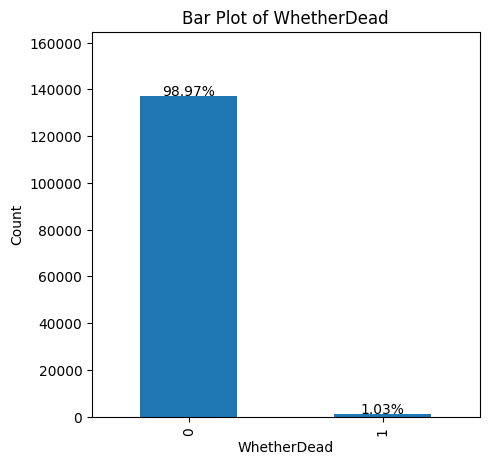

In [57]:
plot_bar(df_dead, ['WhetherDead'])

I can assume that we have 98.97% patiant alive, and 1.03% dead

In [118]:
df.sample()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear
47432,BENE61799,1969-03-01,NaT,2,1,0,45,843,12,12,1,2,1,2,2,1,1,1,2,2,2,16000,1068,180,640,1969


In [119]:
df.shape

(138556, 26)

# Try to clean and make it like others

In [127]:
# replacing the number 2's to 0, this value means "No", while value 1 means "Yes"
bene_df = df.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                        'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                        'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                        'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
bene_df['RenalDiseaseIndicator'] = bene_df['RenalDiseaseIndicator'].apply(lambda x: 1 if x == 'Y' else 0)
bene_df.sample(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear
61151,BENE76463,1932-10-01,NaT,2,1,0,17,450,12,12,0,0,0,0,0,0,1,1,0,0,0,26000,1068,960,1050,1932
118025,BENE137273,1923-06-01,NaT,2,1,1,23,730,12,12,0,1,1,0,1,0,1,1,1,0,0,0,0,780,110,1923
116181,BENE135292,1910-10-01,NaT,2,1,0,10,420,12,12,1,1,0,0,0,1,1,1,1,0,0,11000,1068,720,420,1910
59725,BENE74951,1920-08-01,NaT,1,2,1,11,790,12,12,1,0,1,0,0,1,1,1,0,0,0,0,0,9000,2620,1920
80562,BENE97235,1938-08-01,NaT,2,1,1,19,570,12,12,1,1,0,0,0,1,0,1,0,0,0,0,0,90,60,1938


In [136]:
col_names = [
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke']
val_count(bene_df, col_names)

Value counts for: Gender
2    79106
1    59450
Name: count, dtype: int64:
***********************


Value counts for: Race
1    117057
2     13538
3      5059
5      2902
Name: count, dtype: int64:
***********************


Value counts for: RenalDiseaseIndicator
0    118978
1     19578
Name: count, dtype: int64:
***********************


Value counts for: NoOfMonths_PartACov
12    137389
0       1000
6         38
11        28
8         26
10        18
7         16
4         13
5          8
9          7
3          5
2          5
1          3
Name: count, dtype: int64:
***********************


Value counts for: NoOfMonths_PartBCov
12    136902
0        675
6        282
10       150
11       143
9        122
8         71
7         63
5         50
4         35
3         27
2         19
1         17
Name: count, dtype: int64:
***********************


Value counts for: ChronicCond_Alzheimer
0    92530
1    46026
Name: count, dtype: int64:
***********************


Value counts for: Chroni

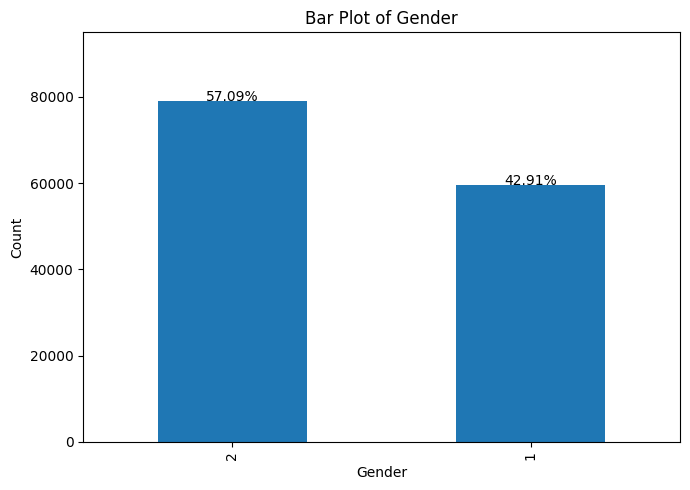

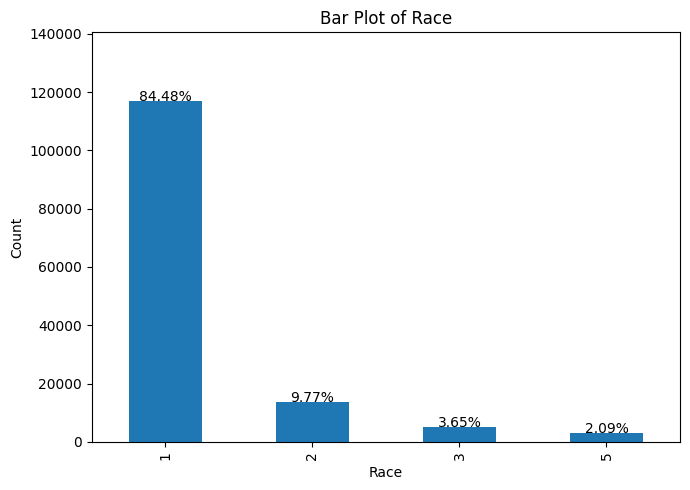

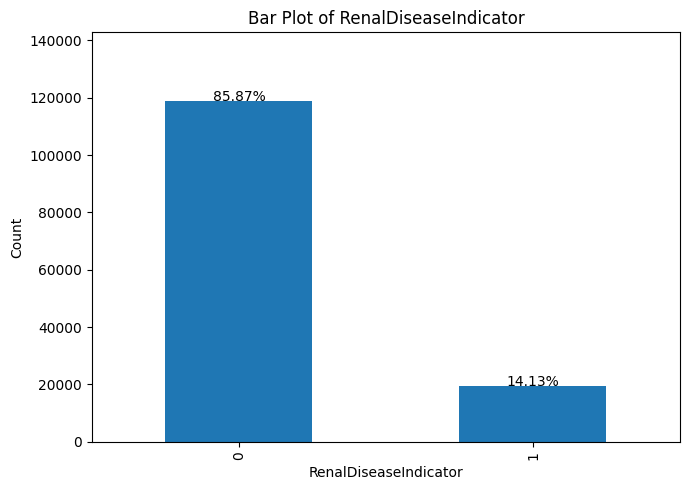

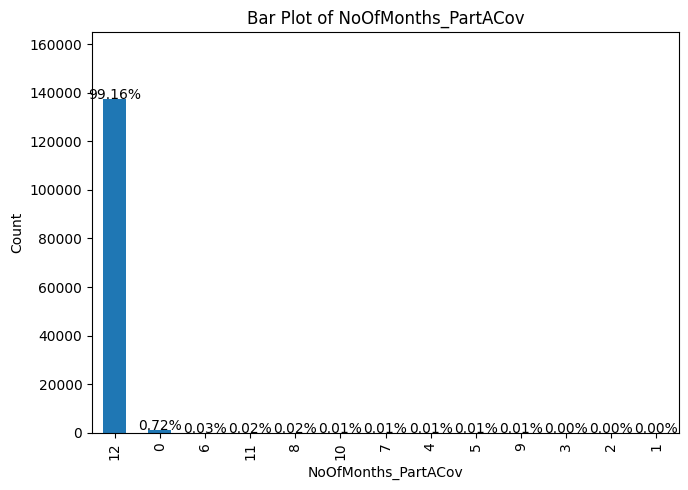

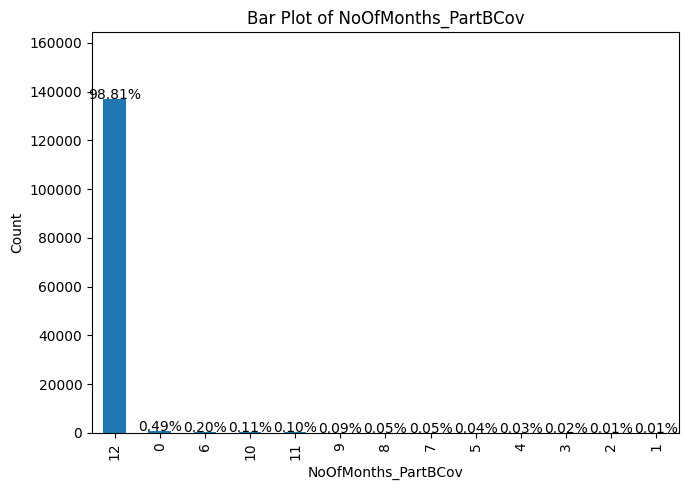

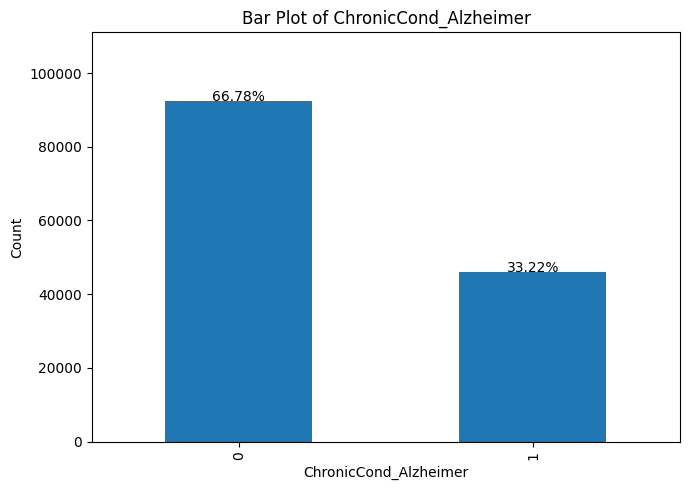

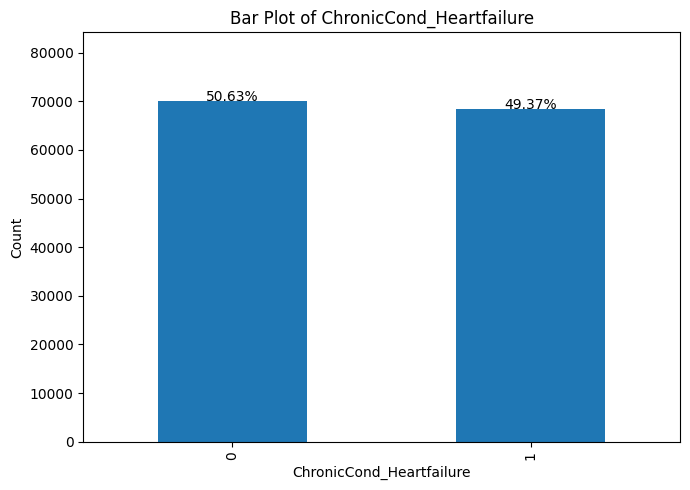

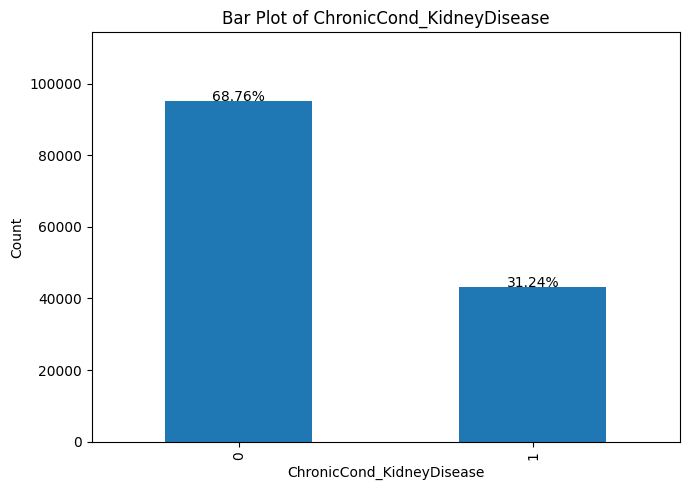

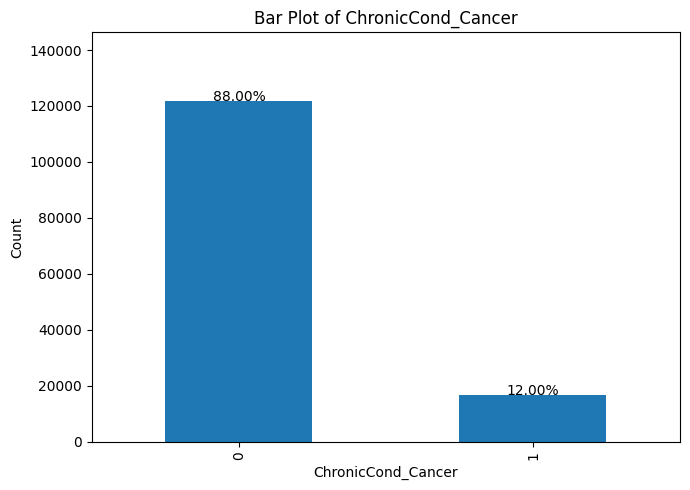

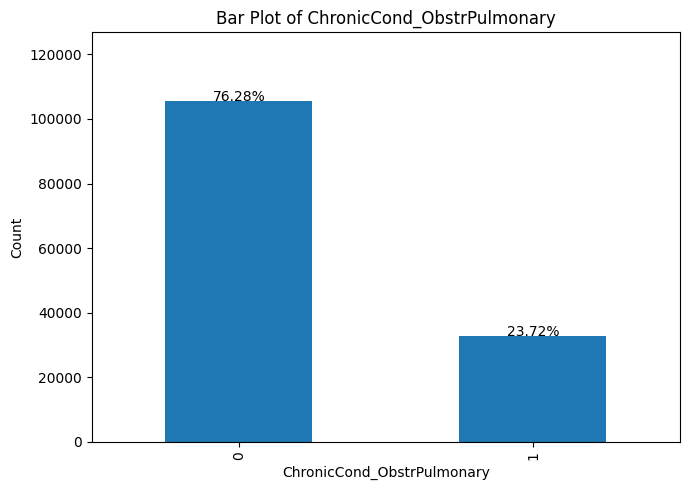

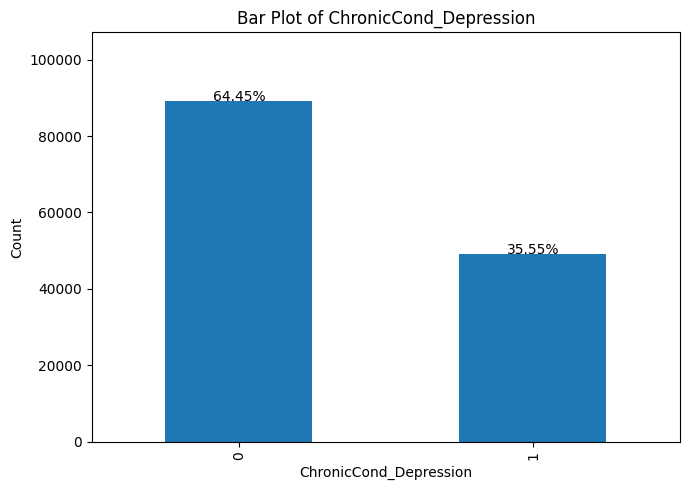

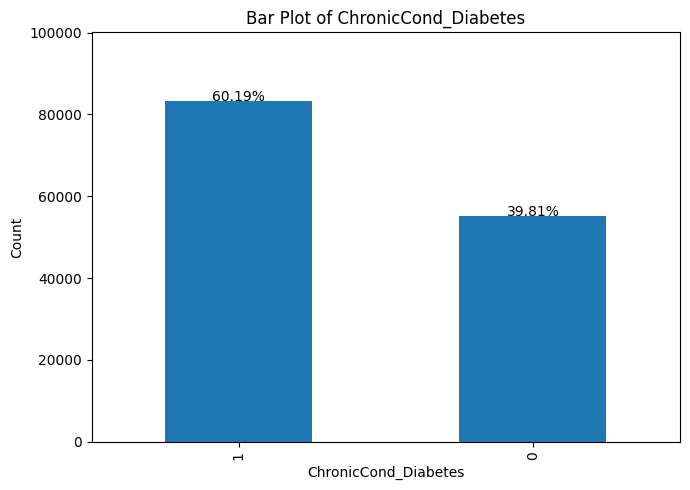

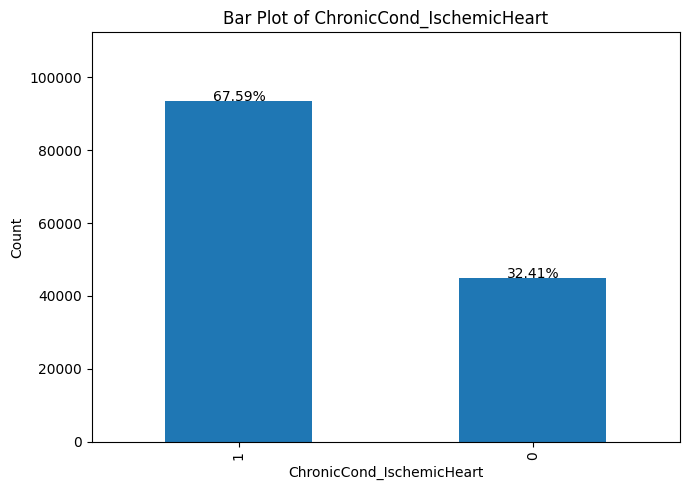

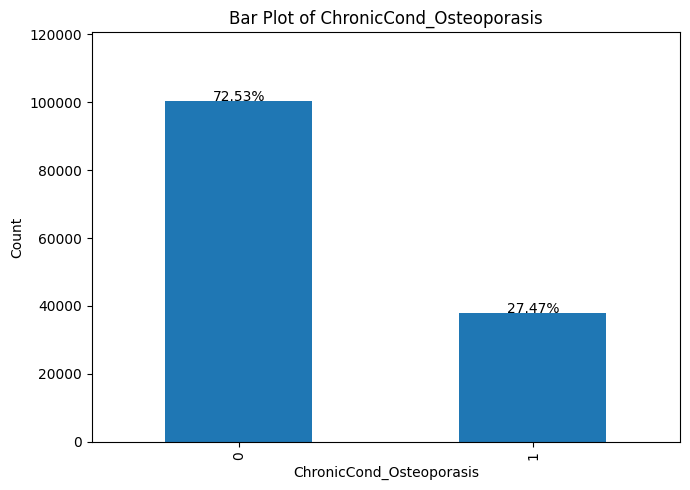

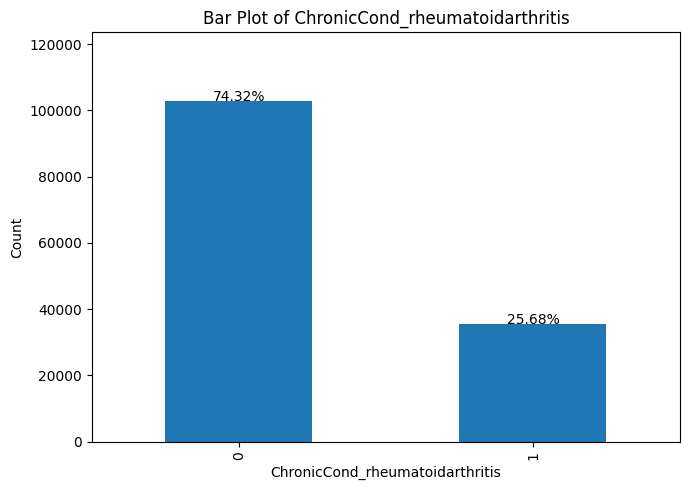

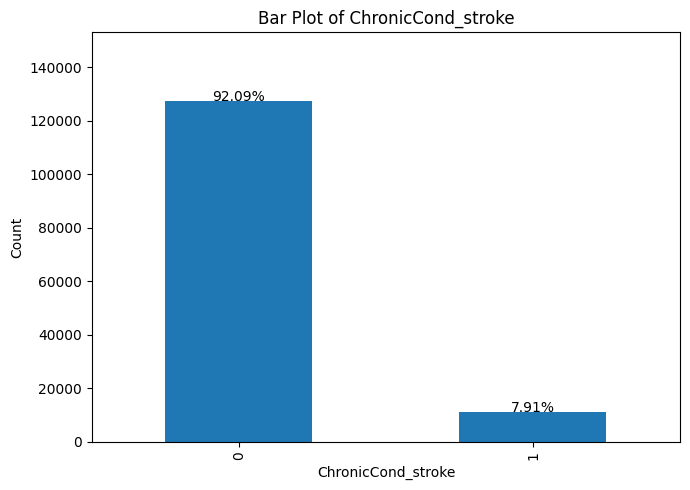

In [139]:
plot_bar(bene_df, col_names)